In [1]:
import ast
import pandas as  pd
from datasets import load_dataset
import matplotlib.pyplot as  plt

dataset =load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA =df[df['job_title_short']=='Data Analyst'].copy()

C:\Users\alpha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


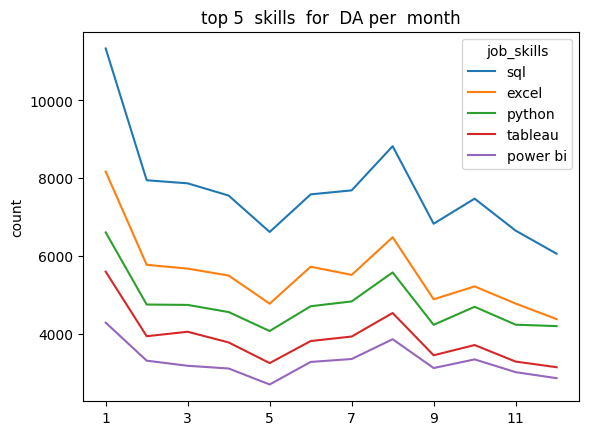

In [2]:
# WE  ARE  HERE   FOCUSSING ON  DATA  ANALYST
df_DA=df[df['job_title_short']=='Data Analyst'].copy()
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month
df_DA_explode=df_DA.explode('job_skills')
df_DA_pivot=df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total']= df_DA_pivot.sum()
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot
df_DA_pivot.iloc[: ,:5].plot(kind='line')
plt.title('top 5  skills  for  DA per  month')
plt.ylabel("count")
plt.xlabel("")
plt.show()

Text(0.5, 1.0, 'top  5 skills  for  DA  per month')

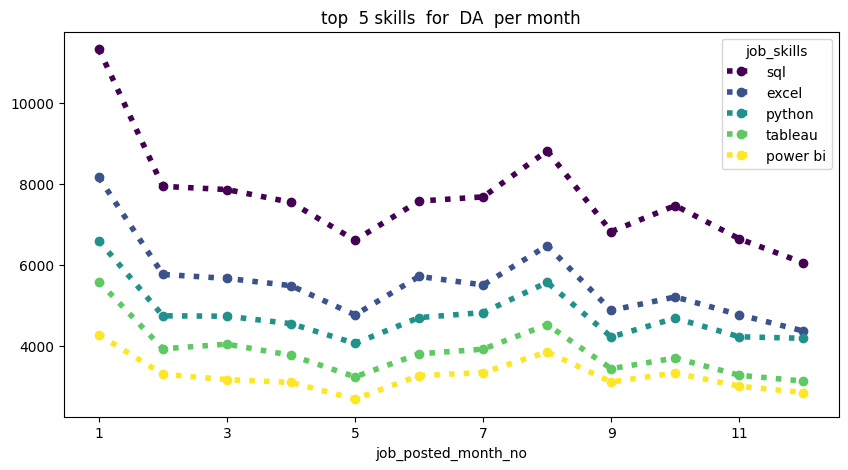

In [3]:
df_DA_pivot.iloc[: ,:5].plot(kind='line',
                             linewidth=4,
                             linestyle=':',
                             colormap='viridis',
                             marker='o',
                             markersize=6,
                             figsize=(10,5)
                             
                             )
plt.title("top  5 skills  for  DA  per month")


In [4]:
# customizing  our scaatter plot  from 15_scatter_plot.ipynb
df_explode=df.explode('job_skills')
skill_stats=df_explode.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_count=20
skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)
skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


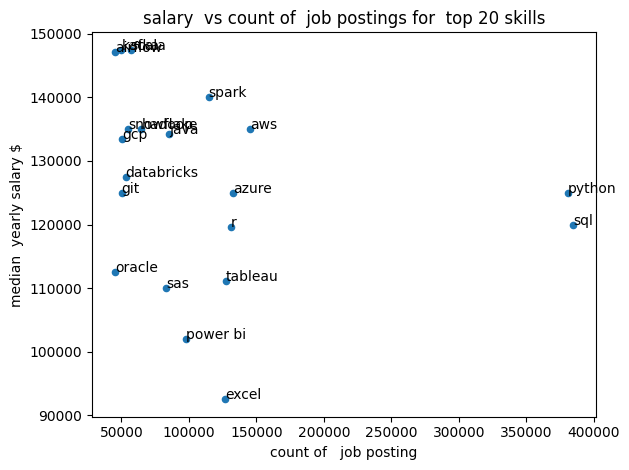

In [5]:

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)


plt.xlabel('count of   job posting')
plt.ylabel('median  yearly salary $')
plt.title('salary  vs count of  job postings for  top 20 skills')
plt.tight_layout()
plt.show()

In [6]:
!pip install adjustText



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: C:\Users\alpha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


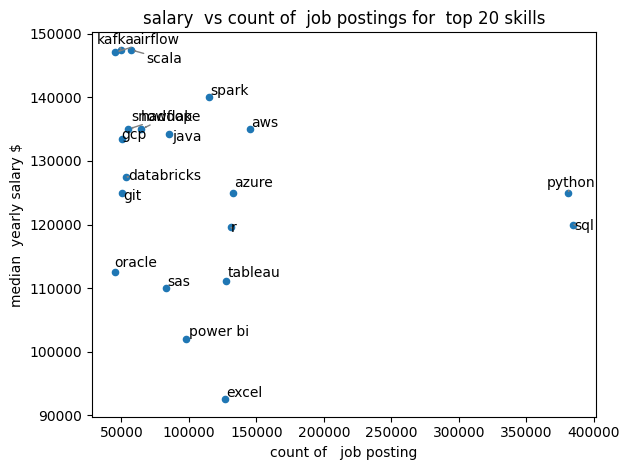

In [7]:
from  adjustText import  adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle="->",color="gray",lw=1))

plt.xlabel('count of   job posting')
plt.ylabel('median  yearly salary $')
plt.title('salary  vs count of  job postings for  top 20 skills')
plt.tight_layout()
plt.show()

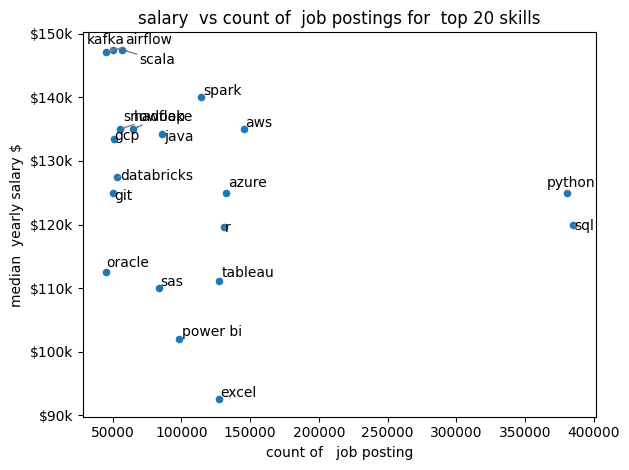

In [8]:
# next   modification for  the   axis
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle="->",color="gray"))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, post:f'${int(y/1000)}k'))
plt.xlabel('count of   job posting')
plt.ylabel('median  yearly salary $')
plt.title('salary  vs count of  job postings for  top 20 skills')
plt.tight_layout()
plt.show()

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


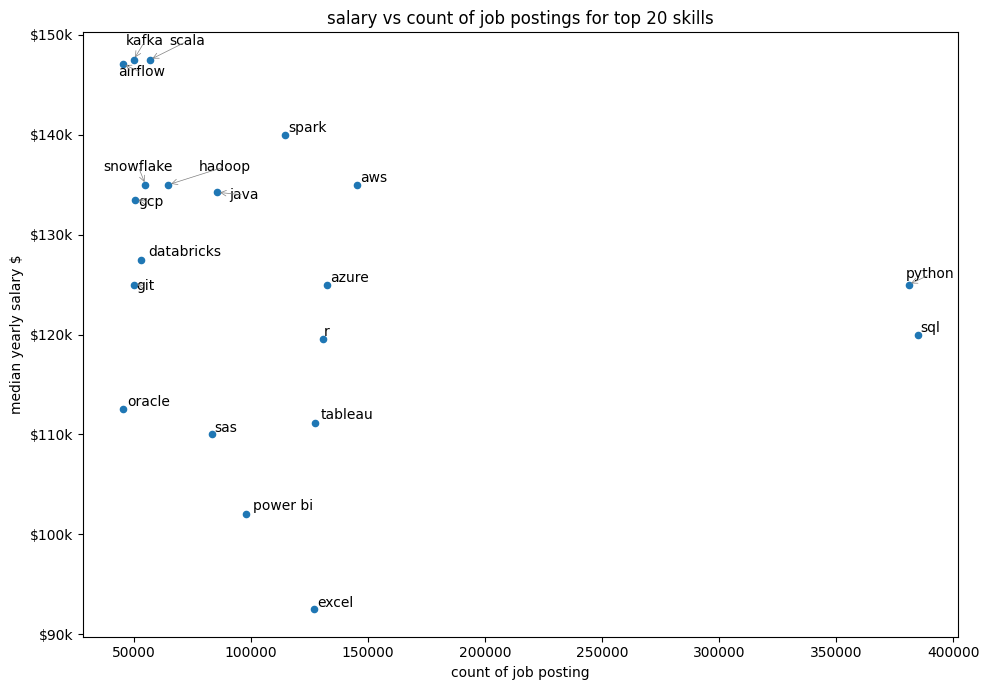

In [9]:
#improve  version
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

plt.gcf().set_size_inches(10,7)   # small add-on

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(
        plt.text(
            skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt
        )
    )

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color="gray", lw=0.5),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_points=0.5,
    force_text=0.5
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
)

plt.xlabel('count of job posting')
plt.ylabel('median yearly salary $')
plt.title('salary vs count of job postings for top 20 skills')

plt.tight_layout()
plt.show()


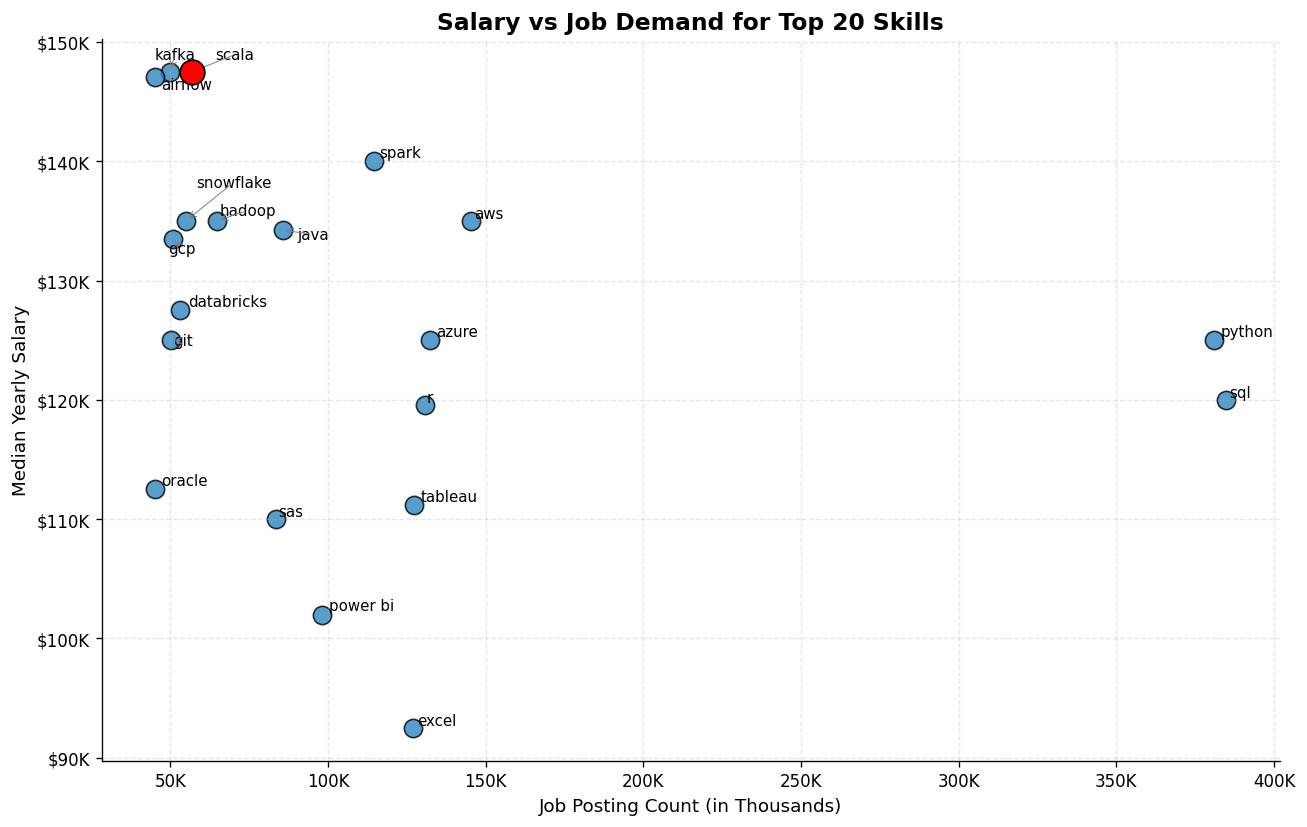

In [10]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.ticker as mtick

# ---- Scatter Plot ----
ax = skill_stats.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary',
    s=120,
    color='#2E86C1',
    edgecolor='black',
    alpha=0.8
)

# ---- Improve Figure Size ----
plt.gcf().set_size_inches(11, 7)
plt.gcf().set_dpi(120)

# ---- Add Skill Labels ----
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(
        plt.text(
            skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt,
            fontsize=9
        )
    )

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color="gray", lw=0.6),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_points=0.8,
    force_text=0.8
)

# ---- Highlight Highest Paying Skill ----
top_skill = skill_stats['median_salary'].idxmax()

ax.scatter(
    skill_stats.loc[top_skill, 'skill_count'],
    skill_stats.loc[top_skill, 'median_salary'],
    color='red',
    s=220,
    edgecolor='black',
    zorder=3
)

# ---- Axis Formatting ----
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda y, pos: f'${y/1000:.0f}K')
)

ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
)

# ---- Grid & Style ----
ax.grid(True, linestyle='--', alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ---- Labels & Title ----
plt.xlabel('Job Posting Count (in Thousands)', fontsize=11)
plt.ylabel('Median Yearly Salary', fontsize=11)

plt.title(
    'Salary vs Job Demand for Top 20 Skills',
    fontsize=14,
    weight='bold'
)

plt.tight_layout()
plt.show()


In [12]:
# histogram
import ast
import pandas as  pd
from datasets import load_dataset
import matplotlib.pyplot as  plt

dataset =load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA =df[df['job_title_short']=='Data Analyst'].copy()

In [14]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

Text(0, 0.5, 'number of  jobs')

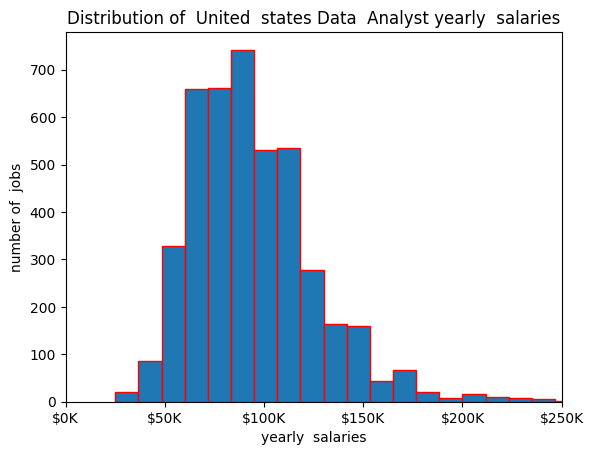

In [21]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='red')
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distribution of  United  states Data  Analyst yearly  salaries')
plt.xlabel('yearly  salaries')
plt.ylabel('number of  jobs')

In [24]:
#boxplots
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US['salary_year_avg'].sample(10)

62569      90000.0
216254     73500.0
210396    100000.0
599981     65000.0
743218     89833.5
22721      72259.0
424255     95000.0
304291     57500.0
196730     70000.0
731210     70000.0
Name: salary_year_avg, dtype: float64

Text(0.5, 1.0, 'salary  distribution for  data  analyst in  US')

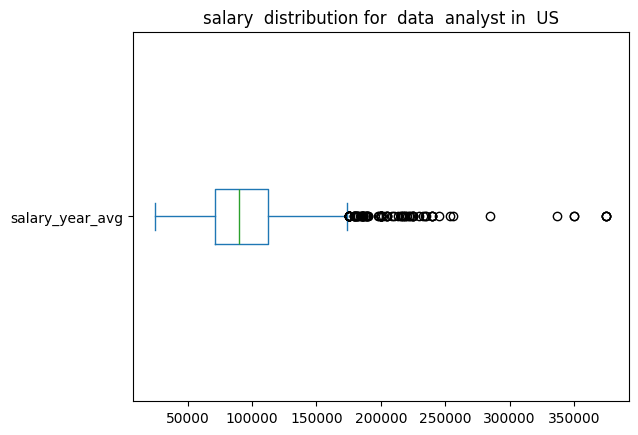

In [30]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)
plt.title('salary  distribution for  data  analyst in  US')

In [31]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']
df_US=df[(df['job_title_short'].isin(job_titles))& (df['job_country']=='United States')].copy()

In [34]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [35]:
# remove nan  values
df_US=df_US.dropna(subset=['salary_year_avg'])

In [38]:
df_US['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [39]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


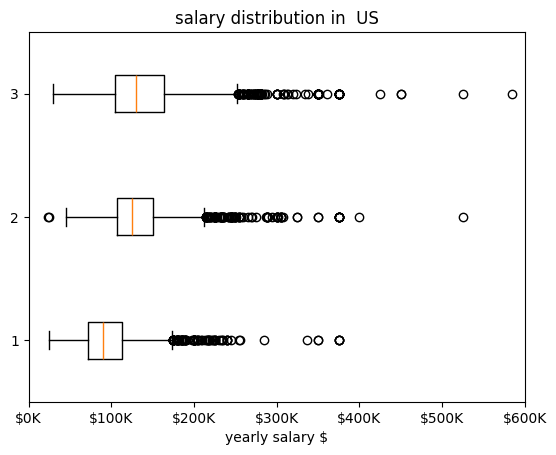

In [48]:
job_list =[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list,label=job_titles,vert=False)
plt.title('salary distribution in  US')
plt.xlabel('yearly salary $')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [43]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64